In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def read_csv(csv_file):
    
    # read csv file
    df = pd.read_csv(csv_file)

    # keep only Geneid, 'shScramble' and 'shDDX41'
    filtered_df = df[['Geneid', 'shScramble', 'shDDX41']]
    filtered_df = filtered_df.dropna(subset=['Geneid', 'shScramble', 'shDDX41'])

    return filtered_df

In [3]:
def tukey_test(df):
    
    melted_df = pd.melt(df, value_vars=['shScramble', 'shDDX41'], var_name='treatment', value_name='value')

    # Effectuer l'ANOVA
    model = ols('value ~ treatment', data=melted_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Effectuer le test de Tukey
    tukey = pairwise_tukeyhsd(endog=melted_df['value'], groups=melted_df['treatment'], alpha=0.05)
    print(tukey)

In [4]:
def deviation(arr):
    median = np.median(arr)
    deviation = np.median(np.abs(arr - median))
    return deviation


In [51]:
def median_absolute_deviation(df, column_name, n=4):
        
    median = np.median(df.loc[:, column_name])
    MAD = stats.median_abs_deviation(df.loc[:, column_name])
    MAD_val_plus = median + n * MAD
    MAD_val_minus = median - n * MAD
    print(median, MAD)
    
    values_above_MAD = df[df.loc[:, column_name] > MAD_val_plus]
    values_below_MAD = df[df.loc[:, column_name] < MAD_val_minus]
    #values_above_MAD.merge(values_below_MAD, how='inner', on='Geneid')
        
    return (values_below_MAD, values_above_MAD)

In [52]:
def visualisation(df):

    #df['Difference'] = df['shScramble'] - df['shDDX41']

    # Créer l'histogramme
    plt.figure(figsize=(10, 6))
    #plt.hist(df['Scrbl-Sh'], bins=50, edgecolor='black')
    plt.hist(df['Scrbl-Sh'], bins=50, edgecolor='black')
    plt.title('Histogramme de la différence entre shScramble et shDDX41')
    plt.xlabel('Différence')
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.show()


                 sum_sq       df         F    PR(>F)
treatment  2.149223e+02      1.0  0.005739  0.939612
Residual   1.323253e+09  35336.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
shDDX41 shScramble    0.156 0.9396 -3.8794 4.1914  False
--------------------------------------------------------
0        0.000000
1        0.000000
2        0.000000
3       -0.002270
4       -0.631989
           ...   
17664    0.000000
17665    0.000000
17666   -0.739177
17667   -0.076689
17668   -0.403506
Name: Scrbl-Sh, Length: 17669, dtype: float64


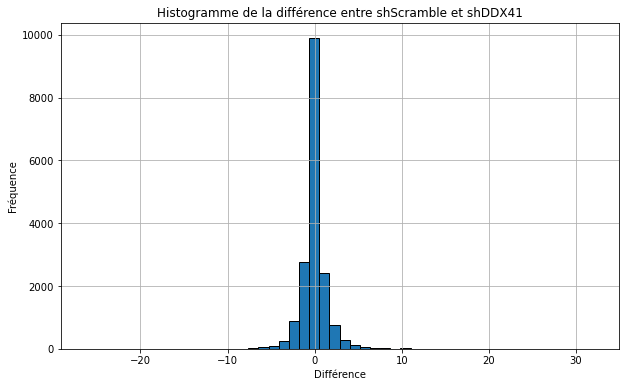

0.0 0.4251471010034278


(                   Geneid  shScramble     shDDX41  Scrbl-Sh
 12     ENSG00000131591.18   12.865117   30.399322 -1.926760
 20     ENSG00000162572.21    0.000000    3.581078 -1.892374
 28     ENSG00000175756.14  609.731055  810.626203 -3.778765
 30      ENSG00000242485.6  152.157316  222.258923 -2.573144
 36     ENSG00000197785.14   50.075017  107.758960 -3.304331
 ...                   ...         ...         ...       ...
 17607  ENSG00000131408.15   84.202425  139.433624 -2.632014
 17613  ENSG00000142530.11    2.880379   11.570410 -1.704363
 17615  ENSG00000161677.12   38.108191  107.851555 -4.211977
 17622   ENSG00000142511.4    0.000000    3.786141 -1.945801
 17623   ENSG00000261341.7    0.000000    6.159760 -2.481886
 
 [1433 rows x 4 columns],
                    Geneid   shScramble      shDDX41  Scrbl-Sh
 10     ENSG00000188157.15    97.366780    28.574967  4.521905
 16     ENSG00000078808.20   320.587577   234.796486  2.581889
 17      ENSG00000176022.7    23.878910     5.13862

In [53]:
csv_file = 'donnees_Riboseq.csv'
df = read_csv(csv_file)
tukey_test(df)
#visualisation(df)

# Calculate the scramble-sh difference, and then apply the MAD
diff = df['shScramble'] - df["shDDX41"]
#diffScrblSh = pd.DataFrame({'GeneID' : df[["Geneid"]], 'Scrbl-Sh' : diff}, index='GeneID')

df["Scrbl-Sh"] =  np.sqrt(df['shScramble']) - np.sqrt(df["shDDX41"])  # This is the difference of the normalised values now

print(df["Scrbl-Sh"])

#mad_shScramble = median_absolute_deviation(df[['Geneid', 'shScramble']])
#mad_shDDX41 = median_absolute_deviation(df[['Geneid', 'shDDX41']])

visualisation(df)

median_absolute_deviation(df, 'Scrbl-Sh')

# Afficher les résultats
#print(f'Median Absolute Deviation for shScramble: {mad_shScramble}')
#print(f'Median Absolute Deviation for shDDX41: {mad_shDDX41}')


